In [1]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

import cv2

%matplotlib inline

In [2]:
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
from mrcnn.config import Config


Using TensorFlow backend.


In [3]:
#Mask_RCNN 패키지의 samples/balloon 디렉토리의 balloon.py 를 import 한다. 
ROOT_DIR = os.path.abspath(".")
sys.path.append(os.path.join(ROOT_DIR, "samples/defect/"))

import defect_coco

In [88]:
import subprocess
from pathlib import Path

HOME_DIR = str(Path.home())
DEFECT_DATA_DIR = "D:/smlee/maskrcnn/Mask_RCNN/data/split_0601/"

In [5]:
dataset = defect_coco.DefectDataset(DEFECT_DATA_DIR, "train")
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
class_ids: [1, 2, 3, 4, 5, 6]
Image Count: 607
Class Count: 7
  0. BG                                                
  1. Crack                                             
  2. Efflor                                            
  3. Fail                                              
  4. Leakage                                           
  5. peeling                                           
  6. desqu                                             


In [6]:
# dataset의 image_info는 리스트 객체이며 내부 원소로 이미지별 세부 정보를 딕셔너리로 가지고 있음. 
# dataset의 image_ids 는 이미지의 고유 id나 이름이 아니라 dataset에서 이미지의 상세 정보를 관리하기 위한 리스트 인덱스에 불과 

print('#### balloon 데이터 세트 이미지의 인덱스 ID들 ####')
print(dataset.image_ids)
print('\n ##### balloon 데이터 세트의 이미지 정보들 ####')
print(dataset.image_info)

#### balloon 데이터 세트 이미지의 인덱스 ID들 ####
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 

In [7]:
image_28 = dataset.image_info[28]
annos = image_28['annotations']
anno_1 = np.array(annos[0]['segmentation'])
anno_2 = np.array(annos[1]['segmentation'])
print(anno_1, anno_2)
                  

[[504.24 278.45 503.53 289.75 505.65 300.35 507.77 310.95 505.65 321.55
  503.53 332.16 501.41 342.76 500.   353.36 499.29 364.66 497.88 375.97
  490.11 383.75 479.51 385.87 474.56 375.97 470.32 366.08 467.49 355.48
  468.2  344.17 468.2  332.86 467.49 322.26 468.2  311.66 470.32 301.06
  471.02 290.46 475.27 279.86 480.92 270.67 491.52 267.14 503.53 269.26]] [[581.98 284.81 592.58 280.57 602.47 275.62 612.37 270.67 622.97 265.72
  633.57 261.48 644.17 260.78 654.77 260.07 666.08 260.07 677.39 260.07
  687.28 264.31 702.83 271.38 712.01 278.45 717.67 288.34 724.73 296.82
  725.44 307.42 726.15 318.73 723.32 329.33 716.96 339.22 712.01 349.12
  707.07 359.01 698.59 366.78 687.99 372.44 677.39 373.14 673.85 362.54
  671.73 351.24 669.61 340.64 663.96 331.45 654.77 325.8  644.88 320.85
  634.98 316.61 625.09 312.37 614.49 310.95 603.89 311.66 603.18 322.26
  603.89 332.86 603.18 343.46 604.59 354.06 608.13 364.66 612.37 375.27
  613.78 385.87 616.61 400.   616.61 410.6  623.67 416.25 635.

In [8]:
annos['segmentation']

TypeError: list indices must be integers or slices, not str

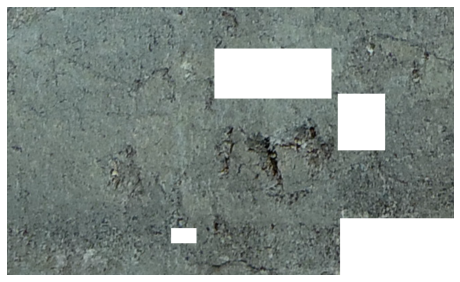

In [9]:
def imread(filename, flags=cv2.IMREAD_COLOR, dtype=np.uint8): 
    try: 
        n = np.fromfile(filename, dtype) 
        img = cv2.imdecode(n, flags) 
        return img 
    except Exception as e: 
        print(e) 
        return None
image_28_array = imread(image_28['path'])
plt.figure(figsize=(8, 8))
plt.axis('off')    
plt.imshow(image_28_array)

In [10]:
image_28.keys()

dict_keys(['id', 'source', 'path', 'width', 'height', 'annotations'])

In [11]:
image_28['path']

'D:/smlee/maskrcnn/Mask_RCNN/data/split_0531//images/train\\A-1 (131)_손상.png'

In [12]:
import skimage

img = np.zeros((10, 10), dtype=np.uint8)
r = np.array([1, 2, 8])
c = np.array([1, 7, 4])
print('img:', img)
# r과 c로 지정된 인덱스에 있는 img 값만 1로 설정함. 
rr, cc = skimage.draw.polygon(r, c)
img[rr, cc] = 1
print('row positions:',rr, 'column positions:',cc)
print('0, 1로 masking된 img:\n',img)
print('Boolean형태로 masking된 img:\n',img.astype(np.bool))

img: [[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
row positions: [2 2 2 2 2 3 3 3 3 3 4 4 4 5 5 5 6 7] column positions: [2 3 4 5 6 2 3 4 5 6 3 4 5 3 4 5 4 4]
0, 1로 masking된 img:
 [[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 0 0 0]
 [0 0 0 1 1 1 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
Boolean형태로 masking된 img:
 [[False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False  True  True  True  True  True False False False]
 [False False  True  True  True  True  True False False False]
 [False False False  True  True  True False False False False]
 [False False False  True  True  True False False False False]

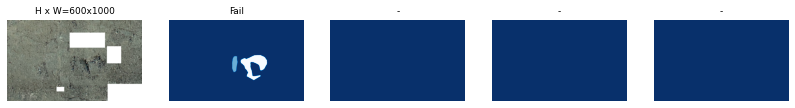

In [13]:
image = dataset.load_image(28)
mask, class_ids = dataset.load_mask(28)
visualize.display_top_masks(image, mask, class_ids, dataset.class_names)


In [91]:
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils

class DefectDataset(utils.Dataset):
    
    def load_defect(self, dataset_dir, subset):
        
        coco_anno = COCO("{}/annotations/{}.json".format(dataset_dir, subset))
        image_dir = "{}/images/{}".format(dataset_dir, subset)
        class_ids = sorted(coco_anno.getCatIds())
        if class_ids:
            image_ids = []
            for id in class_ids:
                image_ids.extend(list(coco_anno.getImgIds(catIds=[id])))
            # Remove duplicates
            image_ids = list(set(image_ids))
        else:
            # All images
            image_ids = list(coco_anno.imgs.keys())
        print(subset)
        print(image_ids)
        # Add classes
        for i in class_ids:
            self.add_class("defect", i, coco_anno.loadCats(i)[0]["name"])
        
        # Add images
        for i in image_ids:
            self.add_image(
                "defect", image_id=i,
                path=os.path.join(image_dir, coco_anno.imgs[i]['file_name']),
                width=coco_anno.imgs[i]["width"],
                height=coco_anno.imgs[i]["height"],
                # annotations=annotations)
                annotations=coco_anno.loadAnns(coco_anno.getAnnIds(
                    imgIds=[i], catIds=class_ids, iscrowd=None)))
    def load_mask(self, image_id):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        # If not a porn dataset image, delegate to parent class.
        image_info = self.image_info[image_id]
        if image_info["source"] != "defect":
            return super(self.__class__, self).load_mask(image_id)

        instance_masks = []
        class_ids = []
        annotations = self.image_info[image_id]["annotations"]
        # print(annotations)

        # Build mask of shape [height, width, instance_count] and list
        # of class IDs that correspond to each channel of the mask.
        for annotation in annotations:
            # print(annotation)
            class_id = self.map_source_class_id(
                "defect.{}".format(annotation['category_id']))
            if class_id:
                m = self.annToMask(annotation, image_info["height"],
                                   image_info["width"])
                # Some objects are so small that they're less than 1 pixel area
                # and end up rounded out. Skip those objects.
                if m.max() < 1:
                    continue
                # Is it a crowd? If so, use a negative class ID.
                if annotation['iscrowd']:
                    # Use negative class ID for crowds
                    class_id *= -1
                    # For crowd masks, annToMask() sometimes returns a mask
                    # smaller than the given dimensions. If so, resize it.
                    if m.shape[0] != image_info["height"] or m.shape[1] != image_info["width"]:
                        m = np.ones([image_info["height"], image_info["width"]], dtype=bool)
                instance_masks.append(m)
                class_ids.append(class_id)

        # Pack instance masks into an array
        if class_ids:
            mask = np.stack(instance_masks, axis=2).astype(np.bool)
            class_ids = np.array(class_ids, dtype=np.int32)
            return mask, class_ids
        else:
            # Call super class to return an empty mask
            return super(DefectDataset, self).load_mask(image_id)
    def annToRLE(self, ann, height, width):
        """
        Convert annotation which can be polygons, uncompressed RLE to RLE.
        :return: binary mask (numpy 2D array)
        """
        segm = ann['segmentation']
        if isinstance(segm, list):
            # polygon -- a single object might consist of multiple parts
            # we merge all parts into one mask rle code
            rles = maskUtils.frPyObjects(segm, height, width)
            rle = maskUtils.merge(rles)
        elif isinstance(segm['counts'], list):
            # uncompressed RLE
            rle = maskUtils.frPyObjects(segm, height, width)
        else:
            # rle
            rle = ann['segmentation']
        return rle

    def annToMask(self, ann, height, width):
        """
        Convert annotation which can be polygons, uncompressed RLE, or RLE to binary mask.
        :return: binary mask (numpy 2D array)
        """
        rle = self.annToRLE(ann, height, width)
        m = maskUtils.decode(rle)
        return m

In [92]:
dataset_train = DefectDataset()
dataset_train.load_defect(DEFECT_DATA_DIR, "train")
dataset_train.prepare()

dataset_val = DefectDataset()
dataset_val.load_defect(DEFECT_DATA_DIR, "val")
dataset_val.prepare()

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
train
[1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 89, 90, 92, 93, 94, 95, 96, 98, 99, 100, 101, 102, 103, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 200, 202, 203, 204, 205, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225

In [93]:
TRAIN_IMAGE_CNT = len(dataset_train.image_info)
VALID_IMAGE_CNT = len(dataset_val.image_info)

class DefectConfig(Config):
    NAME = "DEFECT"
    
    # Number of classes (including background)
    NUM_CLASSES = 1 + 6  # Background + balloon

    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9
    
    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 1
    
    # 추가.
    GPU_COUNT = 1

    # 원본에서 수정.
    #STEPS_PER_EPOCH = TRAIN_IMAGE_CNT  // IMAGES_PER_GPU
    #VALIDATION_STEPS = VALID_IMAGE_CNT  // IMAGES_PER_GPU
    
    # 원본 STEPS_PER_EPOCH
    STEPS_PER_EPOCH = TRAIN_IMAGE_CNT  // IMAGES_PER_GPU
    VALIDATION_STEPS = VALID_IMAGE_CNT  // IMAGES_PER_GPU


# config 설정. 
train_config = DefectConfig()
train_config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                19
IMAGE_MIN_DIM                  600
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE          

In [94]:
import mrcnn.model as modellib
from mrcnn.model import log

defect_model = modellib.MaskRCNN(mode="training", config=train_config, model_dir='./snapshots')

# COCO 데이터 세트로 pretrained 된 모델을 이용하여 초기 weight값 로딩. 
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "./pretrained/mask_rcnn_coco.h5")
defect_model.load_weights(COCO_MODEL_PATH, by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc","mrcnn_bbox", "mrcnn_mask"])

In [98]:
import keras
custom_callbacks = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)


In [95]:
'''
데이터 세트가 작고,단 하나의 클래스임. 
pretrained 된 Coco 데이터 세트로 초기 weight 설정되었기에 RPN과 classifier만 학습해도 모델 성능은 큰 영향이 없을 거라 예상
all: All the layers
3+: Train Resnet stage 3 and up
4+: Train Resnet stage 4 and up
5+: Train Resnet stage 5 and up
'''
print("Training network heads")
defect_model.train(dataset_train, dataset_val,
            learning_rate=train_config.LEARNING_RATE,
            epochs=30,
            layers='heads',
            verbose=1)

Training network heads

Starting at epoch 0. LR=0.001

Checkpoint Path: ./snapshots\defect20210601T1348\mask_rcnn_defect_{epoch:04d}.h5
In model:  rpn_model


c:\users\admin\.conda\envs\tf113\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/30
607/607 [==============================] - 353s 581ms/step - loss: 2.0904 - rpn_class_loss: 0.0574 - rpn_bbox_loss: 0.8553 - mrcnn_class_loss: 0.1449 - mrcnn_bbox_loss: 0.6017 - mrcnn_mask_loss: 0.4310 - val_loss: 2.0842 - val_rpn_class_loss: 0.0480 - val_rpn_bbox_loss: 0.8253 - val_mrcnn_class_loss: 0.1497 - val_mrcnn_bbox_loss: 0.6413 - val_mrcnn_mask_loss: 0.4198
Epoch 2/30
607/607 [==============================] - 344s 567ms/step - loss: 1.8732 - rpn_class_loss: 0.0431 - rpn_bbox_loss: 0.7812 - mrcnn_class_loss: 0.1513 - mrcnn_bbox_loss: 0.5109 - mrcnn_mask_loss: 0.3867 - val_loss: 1.8439 - val_rpn_class_loss: 0.0470 - val_rpn_bbox_loss: 0.7839 - val_mrcnn_class_loss: 0.1639 - val_mrcnn_bbox_loss: 0.4749 - val_mrcnn_mask_loss: 0.3742
Epoch 3/30
607/607 [==============================] - 339s 558ms/step - loss: 1.7905 - rpn_class_loss: 0.0404 - rpn_bbox_loss: 0.8029 - mrcnn_class_loss: 0.1558 - mrcnn_bbox_loss: 0.4424 - mrcnn_mask_loss: 0.3491 - val_loss: 1.7671 - val_rp

607/607 [==============================] - 324s 535ms/step - loss: 0.8937 - rpn_class_loss: 0.0216 - rpn_bbox_loss: 0.4099 - mrcnn_class_loss: 0.0835 - mrcnn_bbox_loss: 0.1754 - mrcnn_mask_loss: 0.2034 - val_loss: 1.8699 - val_rpn_class_loss: 0.0443 - val_rpn_bbox_loss: 0.8925 - val_mrcnn_class_loss: 0.1536 - val_mrcnn_bbox_loss: 0.4219 - val_mrcnn_mask_loss: 0.3576
Epoch 23/30
607/607 [==============================] - 324s 534ms/step - loss: 0.8745 - rpn_class_loss: 0.0217 - rpn_bbox_loss: 0.4038 - mrcnn_class_loss: 0.0786 - mrcnn_bbox_loss: 0.1712 - mrcnn_mask_loss: 0.1992 - val_loss: 1.8341 - val_rpn_class_loss: 0.0439 - val_rpn_bbox_loss: 0.8505 - val_mrcnn_class_loss: 0.1517 - val_mrcnn_bbox_loss: 0.4230 - val_mrcnn_mask_loss: 0.3649
Epoch 24/30
607/607 [==============================] - 323s 532ms/step - loss: 0.8687 - rpn_class_loss: 0.0194 - rpn_bbox_loss: 0.4071 - mrcnn_class_loss: 0.0782 - mrcnn_bbox_loss: 0.1664 - mrcnn_mask_loss: 0.1974 - val_loss: 1.7432 - val_rpn_class_l

In [ ]:
defect_model.train(dataset_train, dataset_val,
            learning_rate=train_config.LEARNING_RATE * 2,
            epochs=30 + 20,
            layers='4+',
            verbose=1,
            custom_callbacks=[custom_callbacks])


Starting at epoch 30. LR=0.002

Checkpoint Path: ./snapshots\defect20210601T1348\mask_rcnn_defect_{epoch:04d}.h5
In model:  rpn_model
Epoch 31/50
607/607 [==============================] - 384s 633ms/step - loss: 1.5199 - rpn_class_loss: 0.0392 - rpn_bbox_loss: 0.7777 - mrcnn_class_loss: 0.1225 - mrcnn_bbox_loss: 0.3027 - mrcnn_mask_loss: 0.2778 - val_loss: 2.3765 - val_rpn_class_loss: 0.0904 - val_rpn_bbox_loss: 1.4477 - val_mrcnn_class_loss: 0.1096 - val_mrcnn_bbox_loss: 0.4207 - val_mrcnn_mask_loss: 0.3081
Epoch 32/50
607/607 [==============================] - 388s 639ms/step - loss: 1.3130 - rpn_class_loss: 0.0281 - rpn_bbox_loss: 0.6631 - mrcnn_class_loss: 0.1033 - mrcnn_bbox_loss: 0.2730 - mrcnn_mask_loss: 0.2456 - val_loss: 1.6663 - val_rpn_class_loss: 0.0371 - val_rpn_bbox_loss: 0.7736 - val_mrcnn_class_loss: 0.1757 - val_mrcnn_bbox_loss: 0.3855 - val_mrcnn_mask_loss: 0.2944
Epoch 33/50
 93/607 [===>..........................] - ETA: 4:56 - loss: 1.1320 - rpn_class_loss: 0.026

In [87]:
dataset_train.image_info[425]

{'id': 473,
 'source': 'defect',
 'path': 'D:/smlee/maskrcnn/Mask_RCNN/data/split_0531//images/train\\B-1 (79)_누수_5.png',
 'width': 1000,
 'height': 600,
 'annotations': [{'id': 747,
   'image_id': 473,
   'category_id': 4,
   'segmentation': [[550.25,
     0.99,
     554.75,
     23.07,
     552.7,
     42.71,
     552.29,
     81.97,
     554.75,
     103.23,
     558.43,
     104.05,
     560.88,
     97.1,
     562.11,
     84.01,
     559.65,
     59.47,
     564.56,
     35.75,
     563.74,
     17.76,
     562.93,
     0.0]],
   'area': 949.0,
   'bbox': [550.25, 0.0, 14.31, 104.05],
   'iscrowd': 0,
   'attributes': {'occluded': False}},
  {'id': 748,
   'image_id': 473,
   'category_id': 4,
   'segmentation': [[494.76,
     0.0,
     498.84,
     15.65,
     498.84,
     32.95,
     499.85,
     59.41,
     502.91,
     79.76,
     502.91,
     100.11,
     499.85,
     116.4,
     493.75,
     136.75,
     489.23,
     153.78,
     493.95,
     160.85,
     501.6,
     166.74

In [79]:

with open("{}/annotations/{}.json".format(DEFECT_DATA_DIR, 'train')) as train_json:
    train = json.load(train_json)
    annotations = train['annotations']
    
    train = [a['segmentation'] for a in annotations if a['segmentation']]
    print(train)
#     for anno in train['annotations']:
#         print(anno['image_id'])

[[[293.47, 557.31, 292.89, 521.39, 287.59, 502.54, 276.98, 491.35, 275.22, 480.16, 291.71, 460.14, 305.25, 438.35, 312.91, 403.6, 329.99, 380.05, 326.45, 377.69, 310.55, 398.3, 313.5, 368.86, 314.68, 350.6, 315.27, 339.41, 316.44, 308.79, 323.51, 263.44, 326.45, 250.48, 329.4, 218.68, 329.99, 198.66, 335.88, 173.92, 340.0, 159.79, 340.59, 146.24, 341.18, 122.1, 346.48, 97.95, 351.78, 73.22, 352.37, 50.84, 347.66, 20.8, 344.71, 13.73, 341.18, 6.67, 339.41, 8.43, 340.0, 12.56, 341.77, 23.75, 345.89, 44.36, 347.66, 63.2, 347.07, 78.52, 343.53, 84.41, 334.7, 118.56, 334.11, 127.4, 334.7, 160.97, 328.22, 180.4, 325.87, 191.0, 324.1, 197.48, 324.1, 203.96, 324.1, 210.44, 324.1, 217.5, 324.1, 224.57, 323.51, 230.46, 321.74, 249.31, 315.85, 281.7, 309.96, 325.87, 308.79, 352.96, 305.25, 390.06, 304.66, 403.02, 301.13, 430.11, 285.23, 460.14, 274.63, 473.69, 272.27, 478.4, 271.1, 483.7, 271.1, 489.0, 272.86, 493.71, 273.45, 499.01, 276.98, 503.13, 281.11, 507.84, 283.46, 512.56, 285.82, 517.27,